<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Вакансия: "аналитик данных", парсинг сайта hh.ru в разрезе категорий профессии (junior, middle, senior).

In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
from selenium import webdriver

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [63]:
# получение htlm-страницы для работы без библиотеки selenium 
params = {
        'text': 'Аналитик данных',
        'area': {1, 66}, 
        'per_page': 100 ,
        'search_field': 'name'
    }
    
    
req = requests.get('https://api.hh.ru/vacancies', params)

print(req.status_code)
print()
print(req.text)

200

{"items":[{"id":"86559948","premium":false,"name":"Начинающий аналитик данных","department":null,"has_test":false,"response_letter_required":false,"area":{"id":"1","name":"Москва","url":"https://api.hh.ru/areas/1"},"salary":{"from":35000,"to":null,"currency":"RUR","gross":false},"type":{"id":"open","name":"Открытая"},"address":null,"response_url":null,"sort_point_distance":null,"published_at":"2023-09-11T16:35:53+0300","created_at":"2023-09-11T16:35:53+0300","archived":false,"apply_alternate_url":"https://hh.ru/applicant/vacancy_response?vacancyId=86559948","show_logo_in_search":null,"insider_interview":null,"url":"https://api.hh.ru/vacancies/86559948?host=hh.ru","alternate_url":"https://hh.ru/vacancy/86559948","relations":[],"employer":{"id":"4138182","name":"Topface Media","url":"https://api.hh.ru/employers/4138182","alternate_url":"https://hh.ru/employer/4138182","logo_urls":{"90":"https://hhcdn.ru/employer-logo/3078452.png","240":"https://hhcdn.ru/employer-logo/3078453.png","o

In [3]:
# поисковый запрос на сайте hh.ru
URL = 'https://hh.ru/search/vacancy?area=1&area=66&enable_snippets=true&items_on_page=100&search_field=name&text=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA+%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85'

In [4]:
driver = webdriver.Firefox()

In [5]:
# функция для поиска количества страниц отображения поискового запроса
def find_max_pages():
    driver.get(URL)
    
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    
    paginator = soup.find_all('span', {'class': 'pager-item-not-in-short-range'})
    
    pages = []
    
    for page in paginator:
        pages.append(int(page.find('a').text))
        
    return pages[-1]

In [6]:
# число страниц поискового запроса
max_page = find_max_pages()
print(max_page)

5


In [7]:
# функция для извлечения перечня вакансий
def find_jobs(last_page):
    jobs = []
    for page in range(last_page):
        driver.get(f'{URL}&page={page}')
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        results = soup.find_all('div', {'class':'vacancy-serp-item-body__main-info'})
        
        for result in results:
            jobs.append(result.find('a').text)
            
        
        
    return jobs

In [8]:
# функция для извлечения городов для вакансий
def find_city(last_page):
    city = []
    for page in range(last_page):
        driver.get(f'{URL}&page={page}')
        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        results = soup.find_all('div', {'class':'vacancy-serp-item-body__main-info'})
        
        for result in results:
            city.append(result.find(attrs={'data-qa':'vacancy-serp__vacancy-address'}).text)
            
        
        
    return city

In [9]:
# получение списка вакансий
jobs = find_jobs(max_page)

In [10]:
# получение списка городов
cities = find_city(max_page)

In [11]:
# создадим датафрейм из полученных списков вакансий и городов
data = pd.DataFrame({'vacancy' : jobs, 'city': cities})

In [12]:
data.head()

,vacancy,city
0,Senior System Analyst (Исследование данных и AI-трансформация),"Москва, Верхние Котлы"
1,Senior System Analyst (Исследование данных и AI-трансформация),Москва
2,Аналитик данных,Москва
3,Аналитик данных,Москва
4,Аналитик данных,Москва


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vacancy  421 non-null    object
 1   city     421 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [14]:
print(f'Вакансии аналитиков данных в Москве и Нижнем Новгороде представлены в количестве {len(data)} ед.')

Вакансии аналитиков данных в Москве и Нижнем Новгороде представлены в количестве 421 ед.


In [15]:
data['vacancy'].unique()

array(['Senior System Analyst (Исследование данных и AI-трансформация)',
       'Аналитик данных', 'Аналитик баз данных',
       'Senior Analyst /Аналитик данных',
       'Dаta analyst / Аналитик данных', 'Младший аналитик данных',
       'Старший аналитик данных', 'Аналитик данных Яндекс Недвижимость',
       'Аналитик данных (SQL)', 'Аналитик данных (Data Analyst)',
       'Аналитик данных (Data analyst)',
       'Стажер/Аналитик данных (Python)', 'Бизнес-аналитик данных',
       'Аналитик данных Senior', 'Аналитик данных (розничные риски)',
       'Системный аналитик (проект хранилище данных)',
       'Аналитик данных в отдел маркетинга',
       'Главный специалист (аналитик данных)',
       'Старший аналитик клиентских данных',
       'Аналитик данных (финансовый отдел)',
       'Ведущий аналитик данных (middle)', 'Аналитик данных Team Lead',
       'Аналитик данных (ключевые метрики)',
       'Руководитель группы аналитики данных',
       'Архитектор данных / системный аналитик (D

In [16]:
data['vacancy'].nunique()

293

In [17]:
print(f'Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru имеют очень разнообразные наименования, количество \
уникальных  названий вакансий составляет {data["vacancy"].nunique()} ед.')

Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru имеют очень разнообразные наименования, количество уникальных  названий вакансий составляет 293 ед.


In [18]:
data['city'].unique()

array(['Москва, Верхние Котлы', 'Москва', 'Москва, Электрозаводская',
       'Москва, Кутузовская', 'Москва, Добрынинская и еще\xa02\xa0',
       'Москва, Парк культуры и еще\xa02\xa0', 'Москва, Курская',
       'Москва, Красные ворота', 'Москва, Комсомольская',
       'Москва, Минская', 'Москва, Автозаводская',
       'Москва, Автозаводская и еще\xa01\xa0',
       'Москва, Кутузовская и еще\xa02\xa0',
       'Москва, Сретенский бульвар и еще\xa02\xa0',
       'Москва, Марьина Роща и еще\xa01\xa0', 'Москва, Тульская',
       'Москва, Крестьянская застава и еще\xa02\xa0',
       'Москва, Тимирязевская', 'Москва, Нижегородская и еще\xa03\xa0',
       'Москва, Выставочная и еще\xa03\xa0', 'Москва, Речной вокзал',
       'Москва, Университет', 'Москва, Менделеевская',
       'Москва, Савёловская и еще\xa02\xa0', 'Москва, Нижегородская',
       'Москва, Войковская', 'Москва, Улица 1905 года',
       'Москва, Маяковская', 'Москва, Полежаевская и еще\xa01\xa0',
       'Москва, Выставочная и е

In [19]:
data['city'].nunique()

97

In [20]:
print(f'Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru также имеют {data["city"].nunique()} ед. уникальных \
названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, \
но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.')

Вакансии по поисковому запросу "Аналитик данных" на сайте hh.ru также имеют 97 ед. уникальных названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.


In [21]:
# создадим копию исходного датафрейма для дальнейшей работы и внесения изменений в данные
data2 = data.copy()

In [22]:
# в столбце city оставим только названия городов, удалим названия улиц, станций метро и т.д.
data2['city'] = data2['city'].apply(lambda x: x.split(',')[0])

In [23]:
data2.head()

,vacancy,city
0,Senior System Analyst (Исследование данных и AI-трансформация),Москва
1,Senior System Analyst (Исследование данных и AI-трансформация),Москва
2,Аналитик данных,Москва
3,Аналитик данных,Москва
4,Аналитик данных,Москва


In [24]:
data2['city'].unique()

array(['Москва', 'Нижний Новгород'], dtype=object)

**Уникальные названия городов соответствуют поискову запросу, который осуществлялся по 2-ум городам - Москва и Нижний Новгород.**

**Теперь отсортируем названия вакансий в разрезе категорий Junior, Middle, Senior.**

In [105]:
# подстрока для поска совпадений в категории джуниор
substring_j = r'(?i)(jun|джун|стаж|начинающ|младш|intern)'

In [26]:
# создадим новый столбец jun, в котором будут отображаться найденные совпадения в названиях вакансий по указанной выше подстроке
data2['jun'] = data2.vacancy.str.extract(substring_j, expand = True)

In [27]:
data2['jun'] = data2['jun'].fillna(False)
data2.loc[data2['jun'] != False, 'jun'] = True

In [28]:
data2.query('jun == True')

,vacancy,city,jun
17,Младший аналитик данных,Москва,True
23,Стажер/Аналитик данных (Python),Москва,True
112,Junior Analyst / Младший аналитик данных,Москва,True
235,Младший аналитик данных (Hadoop + Spark),Москва,True
298,"Стажер - аналитик данных (Группа разработки ""Аналитика производительности"", Торговая площадка)",Москва,True
301,Младший аналитик данных,Москва,True
354,Аналитик данных в управлении по управленческому учету и отчетности (стажер),Москва,True
361,Аналитик / Аналитик данных (junior),Москва,True
366,Стажер (Аналитика больших данных и аудит процессов ИТ — Департамент управления рисками),Москва,True
381,Начинающий аналитик данных,Москва,True


In [29]:
len(data2.query('jun == True'))

10

In [140]:
print(f'Количество вакансий "Аналитик данных" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern \
составляет {len(data2.query("jun == True"))} ед., вакансии представлены в городе: {data2.query("jun == True")["city"].unique()}')

Количество вакансий "Аналитик данных" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern составляет 10 ед., вакансии представлены в городе: ['Москва']


In [31]:
# подстрока для поска совпадений в категории миддл
substring_m = r'(?i)(mid|мид)'

In [32]:
# создадим новый столбец mid, в котором будут отображаться найденные совпадения в названиях вакансий по указанной выше подстроке
data2['mid'] = data2.vacancy.str.extract(substring_m, expand = True)

In [33]:
data2['mid'] = data2['mid'].fillna(False)
data2.loc[data2['mid'] != False, 'mid'] = True

In [34]:
data2.query('mid == True')

,vacancy,city,jun,mid
34,Ведущий аналитик данных (middle),Москва,False,True
73,Аналитик данных в команду коммерческой аналитики / Middle data analyst,Москва,False,True
75,Аналитик данных / Middle Data Analyst,Москва,False,True
167,Аналитик Данных Middle+/Senior,Москва,False,True
202,Аналитик данных (middle) в команду розничного кредитного конвейера,Москва,False,True
334,"Аналитик данных middle (Управление ""Сквозные бизнес-компоненты"")",Москва,False,True
357,Аналитик данных / Data Scientist (middle+),Москва,False,True
376,Middle Data Analyst/ Аналитик Данных,Москва,False,True
382,Аналитик данных (middle),Москва,False,True
400,Аналитик данных (middle / senior) отдел ИРО,Москва,False,True


In [35]:
len(data2.query('mid == True'))

11

In [36]:
print(f'Количество вакансий "Аналитик данных" в категории middle/миддл \
составляет {len(data2.query("mid == True"))} ед., вакансии представлены в городе: {data2.query("mid == True")["city"].unique()}')

Количество вакансий "Аналитик данных" в категории middle/миддл составляет 11 ед., вакансии представлены в городе: ['Москва']


In [37]:
# подстрока для поска совпадений в категории сениор
substring_s = r'(?i)(sen|сен|син|ведущ|старш|главн|руковод)'

In [38]:
# создадим новый столбец sen, в котором будут отображаться найденные совпадения в названиях вакансий по указанной выше подстроке
data2['sen'] = data2.vacancy.str.extract(substring_s, expand = True)

In [39]:
data2['sen'] = data2['sen'].fillna(False)
data2.loc[data2['sen'] != False, 'sen'] = True

In [40]:
data2.query('sen == True')

,vacancy,city,jun,mid,sen
0,Senior System Analyst (Исследование данных и AI-трансформация),Москва,False,False,True
1,Senior System Analyst (Исследование данных и AI-трансформация),Москва,False,False,True
12,Senior Analyst /Аналитик данных,Москва,False,False,True
18,Старший аналитик данных,Москва,False,False,True
26,Аналитик данных Senior,Москва,False,False,True
30,Главный специалист (аналитик данных),Москва,False,False,True
31,Старший аналитик клиентских данных,Москва,False,False,True
34,Ведущий аналитик данных (middle),Москва,False,True,True
39,Руководитель группы аналитики данных,Москва,False,False,True
51,Руководитель по сбору и аналитике данных для ГИС,Москва,False,False,True


In [41]:
len(data2.query('sen == True'))

54

In [42]:
print(f'Количество вакансий "Аналитик данных" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель \
составляет {len(data2.query("sen == True"))} ед., вакансии представлены в городе: {data2.query("sen == True")["city"].unique()}. \
Также следует отметить, что по нескольким вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии \
работодатель указал такие условия.')

Количество вакансий "Аналитик данных" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель составляет 54 ед., вакансии представлены в городе: ['Москва']. Также следует отметить, что по нескольким вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии работодатель указал такие условия.


In [43]:
# создадим новый столбец not_specified, в котором будут отображаться вакансии, которые не имеют совпадений по подстрокам в
# разрезе категорий джуниор/миддл/сениор
data2['not_spec'] = False

In [44]:
data2.loc[(data2['jun'] == False)&(data2['mid'] == False)&(data2['sen'] == False), 'not_spec'] = True

In [45]:
data2.query('not_spec == True').head(15)

,vacancy,city,jun,mid,sen,not_spec
2,Аналитик данных,Москва,False,False,False,True
3,Аналитик данных,Москва,False,False,False,True
4,Аналитик данных,Москва,False,False,False,True
5,Аналитик данных,Москва,False,False,False,True
6,Аналитик данных,Москва,False,False,False,True
7,Аналитик данных,Москва,False,False,False,True
8,Аналитик данных,Москва,False,False,False,True
9,Аналитик баз данных,Москва,False,False,False,True
10,Аналитик данных,Москва,False,False,False,True
11,Аналитик данных,Москва,False,False,False,True


In [46]:
len(data2.query('not_spec == True'))

349

In [48]:
print(f'Количество вакансий "Аналитик данных" без указания категорий junior/middle/senior \
составляет {len(data2.query("not_spec == True"))} ед., что в процентном отношении = {int(len(data2.query("not_spec == True")) / len(data2) * 100)}% \
от всего объёма данных {len(data2)} вакансий. Данные вакансии (без категории) представлены в городе: {data2.query("not_spec == True")["city"].unique()}.')

Количество вакансий "Аналитик данных" без указания категорий junior/middle/senior составляет 349 ед., что в процентном отношении = 82% от всего объёма данных 421 вакансий. Данные вакансии (без категории) представлены в городе: ['Москва' 'Нижний Новгород'].


In [49]:
# создадим сводную таблицу, в которой в разрезе городов будут отображаться категории вакансий
pivot = data2.groupby('city').agg({'jun': 'sum', 'mid':'sum', 'sen':'sum', 'not_spec':'sum'}).reset_index()

In [50]:
pivot

,city,jun,mid,sen,not_spec
0,Москва,10,11,54,339
1,Нижний Новгород,0,0,0,10


<Figure size 1200x800 with 0 Axes>

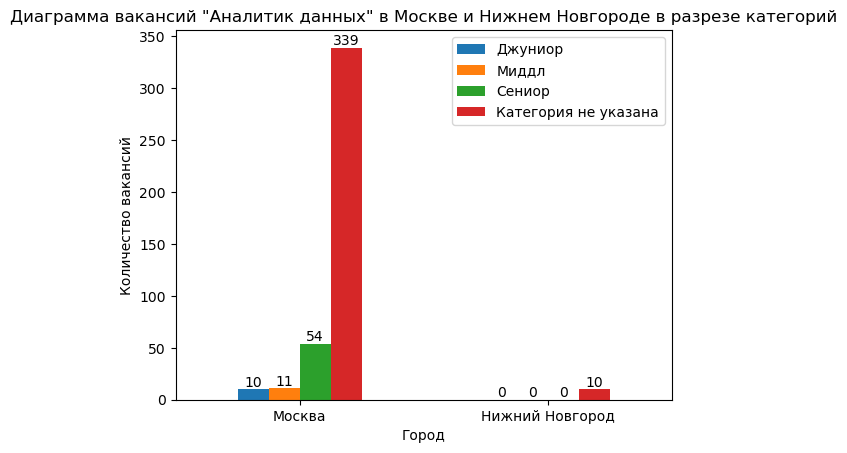

In [116]:
plt.figure(figsize=(12,8))
ax = pivot.plot(x='city', kind='bar', stacked=False)
plt.title('Диаграмма вакансий "Аналитик данных" в Москве и Нижнем Новгороде в разрезе категорий')
plt.xticks(rotation=360)
plt.ylabel('Количество вакансий')
plt.xlabel('Город')
plt.legend(title= None, labels=['Джуниор', 'Миддл', 'Сениор', 'Категория не указана'])

for container in ax.containers :
    ax.bar_label (container) 

plt.show()

In [52]:
print(f'Количество вакансий по специальности "Аналитик данных" в городах Москве и Нижнем Новгороде составило {len(data)} шт. Основное число вакансий - \
{int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0]/len(data)*100)} % опубликовано для Москвы в количестве {int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0])} единиц, \
из которых вакансий с категорией джуниор размещено {int(pivot[["jun"]].sum(axis=1)[0])} шт., вакансий с категорией миддл размещено \
{int(pivot[["mid"]].sum(axis=1)[0])} шт., вакансий с категорией сениор {int(pivot[["sen"]].sum(axis=1)[0])} шт., и вакансий с неуказанной категорией \
{int(pivot[["not_spec"]].sum(axis=1)[0])} шт. На Нижний Новгород пришлось всего {int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[1])} вакансий, что составляет \
{100 - int(pivot[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0] / len(data) * 100)}% от объёма данных.')

Количество вакансий по специальности "Аналитик данных" в городах Москве и Нижнем Новгороде составило 421 шт. Основное число вакансий - 98 % опубликовано для Москвы в количестве 414 единиц, из которых вакансий с категорией джуниор размещено 10 шт., вакансий с категорией миддл размещено 11 шт., вакансий с категорией сениор 54 шт., и вакансий с неуказанной категорией 339 шт. На Нижний Новгород пришлось всего 10 вакансий, что составляет 2% от объёма данных.


# Вакансия: "data scientist", парсинг сайта hh.ru в разрезе категорий профессии (junior, middle, senior).

In [64]:
# получение htlm-страницы для работы без библиотеки selenium 
params = {
        'text': 'Data scientist',
        'area': {1, 66}, 
        'per_page': 50,
        'search_field': 'name'
    }
    
    
req = requests.get('https://api.hh.ru/vacancies', params)

print(req.status_code)
print()
print(req.text)

200

{"items":[{"id":"86571284","premium":false,"name":"Data Scientist (стажер), удаленно","department":null,"has_test":false,"response_letter_required":false,"area":{"id":"1","name":"Москва","url":"https://api.hh.ru/areas/1"},"salary":{"from":null,"to":15000,"currency":"RUR","gross":false},"type":{"id":"open","name":"Открытая"},"address":null,"response_url":null,"sort_point_distance":null,"published_at":"2023-09-11T23:57:33+0300","created_at":"2023-09-11T23:57:33+0300","archived":false,"apply_alternate_url":"https://hh.ru/applicant/vacancy_response?vacancyId=86571284","show_logo_in_search":null,"insider_interview":null,"url":"https://api.hh.ru/vacancies/86571284?host=hh.ru","alternate_url":"https://hh.ru/vacancy/86571284","relations":[],"employer":{"id":"10073113","name":"Дунаев Михаил Алексеевич","url":"https://api.hh.ru/employers/10073113","alternate_url":"https://hh.ru/employer/10073113","logo_urls":{"original":"https://hhcdn.ru/employer-logo-original/1129772.png","90":"https://hhc

In [66]:
URL = 'https://hh.ru/search/vacancy?area=1&area=66&enable_snippets=true&items_on_page=50&search_field=name&text=Data+scientist'

In [68]:
# число страниц поискового запроса
max_page_ds = find_max_pages()
print(max_page_ds)

5


In [69]:
# получение списка вакансий
jobs_ds = find_jobs(max_page_ds)

In [70]:
# получение списка городов
cities_ds = find_city(max_page_ds)

In [71]:
# создадим датафрейм из полученных списков вакансий и городов
data_ds = pd.DataFrame({'vacancy' : jobs_ds, 'city': cities_ds})

In [72]:
data_ds.head()

,vacancy,city
0,Data Scientist,Москва
1,Data scientist,Москва
2,Data Scientist,Москва
3,Data Scientist,Москва
4,Data scientist (computer vision),"Москва, Шаболовская"


In [73]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vacancy  238 non-null    object
 1   city     238 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [75]:
print(f'Вакансии Data scientist в Москве и Нижнем Новгороде представлены в количестве {len(data_ds)} ед.')

Вакансии Data scientist в Москве и Нижнем Новгороде представлены в количестве 238 ед.


In [76]:
data_ds['vacancy'].unique()

array(['Data Scientist', 'Data scientist',
       'Data scientist (computer vision)', 'Data Scientist (NLP)',
       'Data Scientist в Риски', 'Data Scientist (Senior)',
       'Middle / Senior Data Scientist', 'Junior Data Scientist',
       'Data scientist (кредитный скоринг)',
       'Data Scientist (CoreML + RecSys)', 'Data Scientist (Middle)',
       'Teamlead Data Scientist ML',
       'Middle Data Analyst / Data Scientist',
       'Senior Data Scientist (NLP)', 'Middle/Senior Data Scientist',
       'Senior Data Scientist [команда Marketing]',
       'Senior Data scientist (кредитный скоринг)',
       'Lead Data Scientist в SberNBA',
       'Senior NLP Data Scientist (команда SberCare.Боты)',
       'Lead data scientist (Анализ цены и Trade in)',
       'Senior Data Scientist (Команда «Персонализации коммуникаций от потребности клиента»)',
       'Senior Data Scientist (ML-engineer)', 'Lead Data Scientist',
       'Data-Scientist (Опыт работы ОБЯЗАТЕЛЕН от 1 года)',
       'Спец

In [77]:
data_ds['vacancy'].nunique()

168

In [78]:
print(f'Вакансии по поисковому запросу "Data scientist" на сайте hh.ru имеют очень разнообразные наименования, количество \
уникальных  названий вакансий составляет {data_ds["vacancy"].nunique()} ед.')

Вакансии по поисковому запросу "Data scientist" на сайте hh.ru имеют очень разнообразные наименования, количество уникальных  названий вакансий составляет 168 ед.


In [79]:
data_ds['city'].unique()

array(['Москва', 'Москва, Шаболовская',
       'Москва, Белорусская и еще\xa01\xa0', 'Москва, Водный стадион',
       'Москва, Улица 1905 года', 'Москва, Кутузовская',
       'Москва, Кунцевская', 'Москва, Павелецкая и еще\xa02\xa0',
       'Москва, Новокузнецкая', 'Москва, Зорге и еще\xa02\xa0',
       'Нижний Новгород', 'Москва, Парк культуры и еще\xa02\xa0',
       'Москва, Проспект Мира и еще\xa02\xa0',
       'Москва, Выставочная и еще\xa02\xa0',
       'Москва, Окружная и еще\xa03\xa0', 'Москва, Октябрьская',
       'Москва, Кутузовская и еще\xa01\xa0',
       'Москва, Деловой центр и еще\xa02\xa0', 'Москва, Павелецкая',
       'Москва, Баррикадная и еще\xa02\xa0',
       'Москва, Киевская и еще\xa03\xa0', 'Москва, Технопарк',
       'Москва, Белорусская', 'Москва, Динамо и еще\xa01\xa0',
       'Москва, Алексеевская', 'Москва, Аэропорт', 'Москва, Спортивная',
       'Москва, Полежаевская и еще\xa01\xa0', 'Москва, Выставочная',
       'Москва, Партизанская', 'Москва, Международна

In [80]:
data_ds['city'].nunique()

40

In [81]:
print(f'Вакансии по поисковому запросу "Data scientist" на сайте hh.ru также имеют {data_ds["city"].nunique()} ед. уникальных \
названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, \
но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.')

Вакансии по поисковому запросу "Data scientist" на сайте hh.ru также имеют 40 ед. уникальных названий городов, в которых работодателями осуществляется поиск соискателей - за счёт указания не только названий городов, но и названий улиц, станций метро и т.д. Приведём данные к отображению только в виде городов.


In [82]:
# создадим копию исходного датафрейма для дальнейшей работы и внесения изменений в данные
data_ds2 = data_ds.copy()

In [83]:
# в столбце city оставим только названия городов, удалим названия улиц, станций метро и т.д.
data_ds2['city'] = data_ds2['city'].apply(lambda x: x.split(',')[0])

In [84]:
data_ds2.head()

,vacancy,city
0,Data Scientist,Москва
1,Data scientist,Москва
2,Data Scientist,Москва
3,Data Scientist,Москва
4,Data scientist (computer vision),Москва


In [85]:
data_ds2['city'].unique()

array(['Москва', 'Нижний Новгород'], dtype=object)

**Уникальные названия городов соответствуют поискову запросу, который осуществлялся по 2-ум городам - Москва и Нижний Новгород.**.

**Теперь отсортируем названия вакансий в разрезе категорий Junior, Middle, Senior.**

**Подстроки для поиска указанных категорий приведены выше - при работе с вакансией аналитик данных. Воспользуемся уже заданными переменными (substring_j, substring_m. substring_s).**

In [106]:
# создадим новый столбец jun, в котором будут отображаться найденные совпадения в названиях вакансий по указанной выше подстроке
data_ds2['jun'] = data_ds2.vacancy.str.extract(substring_j, expand = True)

In [107]:
data_ds2['jun'] = data_ds2['jun'].fillna(False)
data_ds2.loc[data_ds2['jun'] != False, 'jun'] = True

In [108]:
data_ds2.query('jun == True')

,vacancy,city,jun,mid,sen,not_spec
9,Junior Data Scientist,Москва,True,False,False,False
111,Junior Data scientist,Москва,True,False,False,False
135,Junior Data Scientist,Москва,True,False,False,False
168,Intern Data Scientist,Москва,True,False,False,True
180,"Стажёр - Data scientist, Группа разработки Товарные рекомендации, Поиск, рекомендации, реклама",Москва,True,False,False,False
195,Junior Data Scientist (сопровождение процесса разработки и использования моделей),Москва,True,False,False,False
216,"Data Scientist (стажер), удаленно",Москва,True,False,False,False
218,Экономист-аналитик (junior data scientist),Москва,True,False,False,False
231,Стажер Data scientist (Управление рисками корпоративных клиентов),Москва,True,False,False,False


In [109]:
len(data_ds2.query('jun == True'))

9

In [139]:
print(f'Количество вакансий "Data scientist" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern \
составляет {len(data_ds2.query("jun == True"))} ед., вакансии представлены в городе: {data_ds2.query("jun == True")["city"].unique()}')

Количество вакансий "Data scientist" в категории джуниор/junior/стажёр/младший аналитик/начинающий аналитик/intern составляет 9 ед., вакансии представлены в городе: ['Москва']


In [92]:
# создадим новый столбец mid, в котором будут отображаться найденные совпадения в названиях вакансий по указанной выше подстроке
data_ds2['mid'] = data_ds2.vacancy.str.extract(substring_m, expand = True)

In [93]:
data_ds2['mid'] = data_ds2['mid'].fillna(False)
data_ds2.loc[data_ds2['mid'] != False, 'mid'] = True

In [94]:
data_ds2.query('mid == True')

,vacancy,city,jun,mid
8,Middle / Senior Data Scientist,Москва,False,True
12,Data Scientist (Middle),Москва,False,True
14,Middle Data Analyst / Data Scientist,Москва,False,True
16,Middle/Senior Data Scientist,Москва,False,True
38,Data Scientist middle,Москва,False,True
52,Senior/Middle Data Scientist (Trust&Safety),Москва,False,True
53,Middle/Senior Data Scientist,Москва,False,True
57,Data Scientist ( Middle / Senior ),Москва,False,True
58,Middle Data Scientist (Маркетплейс),Москва,False,True
64,Data Scientist (middle/senior),Москва,False,True


In [95]:
len(data_ds2.query('mid == True'))

37

In [96]:
print(f'Количество вакансий "Data scientist" в категории middle/миддл \
составляет {len(data_ds2.query("mid == True"))} ед., вакансии представлены в городе: {data_ds2.query("mid == True")["city"].unique()}')

Количество вакансий "Data scientist" в категории middle/миддл составляет 37 ед., вакансии представлены в городе: ['Москва']


In [97]:
# создадим новый столбец sen, в котором будут отображаться найденные совпадения в названиях вакансий по указанной выше подстроке
data_ds2['sen'] = data_ds2.vacancy.str.extract(substring_s, expand = True)

In [98]:
data_ds2['sen'] = data_ds2['sen'].fillna(False)
data_ds2.loc[data_ds2['sen'] != False, 'sen'] = True

In [99]:
data_ds2.query('sen == True').head(25)

,vacancy,city,jun,mid,sen
7,Data Scientist (Senior),Москва,False,False,True
8,Middle / Senior Data Scientist,Москва,False,True,True
15,Senior Data Scientist (NLP),Москва,False,False,True
16,Middle/Senior Data Scientist,Москва,False,True,True
17,Senior Data Scientist [команда Marketing],Москва,False,False,True
18,Senior Data scientist (кредитный скоринг),Москва,False,False,True
22,Senior NLP Data Scientist (команда SberCare.Боты),Москва,False,False,True
25,Senior Data Scientist (Команда «Персонализации коммуникаций от потребности клиента»),Москва,False,False,True
28,Senior Data Scientist (ML-engineer),Москва,False,False,True
36,Python senior developer / Data Scientist (Разработчик нейронных сетей и баз данных),Москва,False,False,True


In [100]:
len(data_ds2.query('sen == True'))

70

In [138]:
print(f'Количество вакансий "Data scientist" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель \
составляет {len(data_ds2.query("sen == True"))} ед., вакансии представлены в городе: {data_ds2.query("sen == True")["city"].unique()}. \
Также следует отметить, что по некоторым вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии \
работодатель указал такие условия.')

Количество вакансий "Data scientist" в категории senior/сениор/ведущий аналитик/старший аналитик/главный аналитик/руководитель составляет 70 ед., вакансии представлены в городе: ['Москва' 'Нижний Новгород']. Также следует отметить, что по некоторым вакансиям есть пересечения между middle/senior, т.к. в размещённой вакансии работодатель указал такие условия.


In [102]:
# создадим новый столбец not_specified, в котором будут отображаться вакансии, которые не имеют совпадений по подстрокам в
# разрезе категорий джуниор/миддл/сениор
data_ds2['not_spec'] = False

In [103]:
data_ds2.loc[(data_ds2['jun'] == False)&(data_ds2['mid'] == False)&(data_ds2['sen'] == False), 'not_spec'] = True

In [104]:
data_ds2.query('not_spec == True').head(15)

,vacancy,city,jun,mid,sen,not_spec
0,Data Scientist,Москва,False,False,False,True
1,Data scientist,Москва,False,False,False,True
2,Data Scientist,Москва,False,False,False,True
3,Data Scientist,Москва,False,False,False,True
4,Data scientist (computer vision),Москва,False,False,False,True
5,Data Scientist (NLP),Москва,False,False,False,True
6,Data Scientist в Риски,Москва,False,False,False,True
10,Data scientist (кредитный скоринг),Москва,False,False,False,True
11,Data Scientist (CoreML + RecSys),Москва,False,False,False,True
13,Teamlead Data Scientist ML,Москва,False,False,False,True


In [110]:
len(data_ds2.query('not_spec == True'))

140

In [112]:
print(f'Количество вакансий "Data scientist" без указания категорий junior/middle/senior \
составляет {len(data_ds2.query("not_spec == True"))} ед., что в процентном отношении = {int(len(data_ds2.query("not_spec == True")) / len(data_ds2) * 100)}% \
от всего объёма данных {len(data_ds2)} вакансий. Данные вакансии (без категории) представлены в городе: {data_ds2.query("not_spec == True")["city"].unique()}.')

Количество вакансий "Data scientist" без указания категорий junior/middle/senior составляет 140 ед., что в процентном отношении = 58% от всего объёма данных 238 вакансий. Данные вакансии (без категории) представлены в городе: ['Москва' 'Нижний Новгород'].


In [113]:
# создадим сводную таблицу, в которой в разрезе городов будут отображаться категории вакансий
pivot_ds = data_ds2.groupby('city').agg({'jun': 'sum', 'mid':'sum', 'sen':'sum', 'not_spec':'sum'}).reset_index()

In [114]:
pivot_ds

,city,jun,mid,sen,not_spec
0,Москва,9,37,69,135
1,Нижний Новгород,0,0,1,5


<Figure size 1200x800 with 0 Axes>

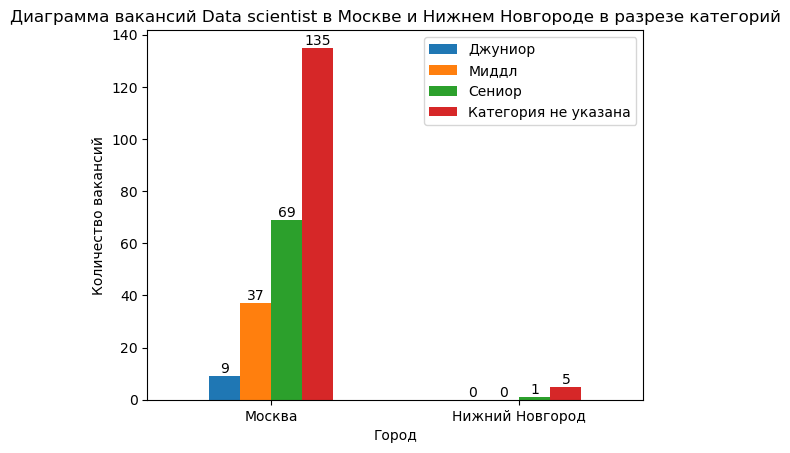

In [115]:
plt.figure(figsize=(12,8))
ax = pivot_ds.plot(x='city', kind='bar', stacked=False)
plt.title('Диаграмма вакансий Data scientist в Москве и Нижнем Новгороде в разрезе категорий')
plt.xticks(rotation=360)
plt.ylabel('Количество вакансий')
plt.xlabel('Город')
plt.legend(title= None, labels=['Джуниор', 'Миддл', 'Сениор', 'Категория не указана'])

for container in ax.containers :
    ax.bar_label (container) 

plt.show()

In [129]:
# вакансии для Москвы
m = len(data_ds2.query("city == '''Москва'''"))/len(data_ds)*100
lenm = len(data_ds2.query("city == '''Москва'''"))

In [137]:
print(f'Количество вакансий по специальности "Data scientist" в городах Москве и Нижнем Новгороде составило {len(data_ds)} шт. Основное число вакансий - \
{int(m)} % опубликовано для Москвы в количестве {int(lenm)} единиц, \
из которых вакансий с категорией джуниор размещено {int(pivot_ds[["jun"]].sum(axis=1)[0])} шт., вакансий с категорией миддл размещено \
{int(pivot_ds[["mid"]].sum(axis=1)[0])} шт., вакансий с категорией сениор {int(pivot_ds[["sen"]].sum(axis=1)[0])} шт., и вакансий с неуказанной категорией \
{int(pivot_ds[["not_spec"]].sum(axis=1)[0])} шт. Следует отметить, что есть пересечение по вакансиям в категориях middle и senior. На Нижний Новгород пришлось всего {int(pivot_ds[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[1])} \
вакансий, что составляет {100 - int(pivot_ds[["jun", "mid", "sen", "not_spec"]].sum(axis=1)[0] / len(data_ds) * 100)} % от объёма данных.')

Количество вакансий по специальности "Data scientist" в городах Москве и Нижнем Новгороде составило 238 шт. Основное число вакансий - 97 % опубликовано для Москвы в количестве 232 единиц, из которых вакансий с категорией джуниор размещено 9 шт., вакансий с категорией миддл размещено 37 шт., вакансий с категорией сениор 69 шт., и вакансий с неуказанной категорией 135 шт. Следует отметить, что есть пересечение по вакансиям в категориях middle и senior. На Нижний Новгород пришлось всего 6 вакансий, что составляет -5 % от объёма данных.
